# Libraries 

In [54]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression

In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x0000025F7FC33D00>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Helper functions 

In [3]:
def gender_to_number(gender: str) -> int:
    
    if gender == 'female':
        return 1
    else:
        return 0

# Data 

In [4]:
train = pd.read_csv('data/train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test = pd.read_csv('data/test.csv')

In [60]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_C,Embarked_Q,Cabin_null,Miss,Mrs,Master,Col,Major,Mr,Sex_binary
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,1,1,0,0,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,1,0,1,0,0,0,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,1,1,0,0,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,1,0,0,0,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,1,0,1,0,0,0,1,1


# Solution

## Data preparation

In [46]:
train['Sex_binary'] = train['Sex'].map(gender_to_number)
test['Sex_binary'] = test['Sex'].map(gender_to_number)

In [9]:
features = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
X = train[features]
y = train['Survived']

In [10]:
X = X.fillna(-1)

## Training model 

In [12]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [17]:
# Cross validation 
accuracy_results = []
    
kfold = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for index_train_rows, index_val_rows in kfold.split(X):

    # Get train and validation data using index
    X_train, X_val = X.iloc[index_train_rows], X.iloc[index_val_rows]
    y_train, y_val = y.iloc[index_train_rows], y.iloc[index_val_rows]

    # Train model
    model.fit(X_train, y_train)

    # Model prediction
    predictions = model.predict(X_val)
    accuracy = np.mean(y_val == predictions)
    accuracy_results.append(accuracy)
    print('Accuracy:', accuracy)

print()
print('Accuracy mean:', np.mean(accuracy_results))

Accuracy: 0.7869955156950673
Accuracy: 0.7797752808988764
Accuracy: 0.827354260089686
Accuracy: 0.8179775280898877
Accuracy: 0.7847533632286996
Accuracy: 0.7842696629213484
Accuracy: 0.8161434977578476
Accuracy: 0.7842696629213484
Accuracy: 0.8004484304932735
Accuracy: 0.8
Accuracy: 0.8183856502242153
Accuracy: 0.802247191011236
Accuracy: 0.8116591928251121
Accuracy: 0.8067415730337079
Accuracy: 0.820627802690583
Accuracy: 0.7887640449438202
Accuracy: 0.8385650224215246
Accuracy: 0.8044943820224719
Accuracy: 0.7982062780269058
Accuracy: 0.8112359550561797

Accuracy mean: 0.8041457147175896


## Error analysis 

In [22]:
X_val_check = train.iloc[index_val_rows].copy()
X_val_check['Predictions'] = predictions
X_val_check['Error'] = (X_val_check['Survived'] != X_val_check['Predictions'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Predictions,Error
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,False


## Feature enginnering

In [39]:
train['Embarked_S'] = (train['Embarked'] == 'S').map(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabin_null'] = train['Cabin'].isnull().astype(int)

train['Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Mrs'] = train['Name'].str.contains('Mrs').astype(int)

train['Master'] = train['Name'].str.contains('Master').astype(int)
train['Col'] = train['Name'].str.contains('Col').astype(int)
train['Major'] = train['Name'].str.contains('Major').astype(int)
train['Mr'] = train['Name'].str.contains('Mr').astype(int)

In [41]:
features = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 
            'Embarked_S', 'Embarked_C', 'Embarked_Q',
           'Cabin_null',
           'Miss', 'Mrs',
           'Master', 'Col', 'Major', 'Mr']

X = train[features].fillna(-1)
y = train['Survived']

In [55]:
model = LogisticRegression()

# Cross validation 
accuracy_results_fe = []
    
kfold = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for index_train_rows, index_val_rows in kfold.split(X):

    # Get train and validation data using index
    X_train, X_val = X.iloc[index_train_rows], X.iloc[index_val_rows]
    y_train, y_val = y.iloc[index_train_rows], y.iloc[index_val_rows]

    # Train model
    model.fit(X_train, y_train)

    # Model prediction
    predictions = model.predict(X_val)
    accuracy = np.mean(y_val == predictions)
    accuracy_results_fe.append(accuracy)
    print('Accuracy:', accuracy)

print()
print('Accuracy mean:', np.mean(accuracy_results_fe))

C:\Users\caioh\Documents\Projetos\kaggle\competitions\titanic-machine_learning_from_disaster\titanic_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\caioh\Documents\Projetos\kaggle\competitions\titanic-machine_learning_from_disaster\titanic_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

Accuracy: 0.8318385650224215
Accuracy: 0.8067415730337079
Accuracy: 0.8116591928251121
Accuracy: 0.797752808988764
Accuracy: 0.8161434977578476
Accuracy: 0.8112359550561797
Accuracy: 0.8071748878923767
Accuracy: 0.8179775280898877
Accuracy: 0.8139013452914798
Accuracy: 0.8112359550561797
Accuracy: 0.8251121076233184
Accuracy: 0.8157303370786517
Accuracy: 0.8385650224215246
Accuracy: 0.8
Accuracy: 0.8071748878923767
Accuracy: 0.802247191011236
Accuracy: 0.8408071748878924
Accuracy: 0.8179775280898877
Accuracy: 0.8295964125560538
Accuracy: 0.8247191011235955

Accuracy mean: 0.8163795535849246


C:\Users\caioh\Documents\Projetos\kaggle\competitions\titanic-machine_learning_from_disaster\titanic_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\caioh\Documents\Projetos\kaggle\competitions\titanic-machine_learning_from_disaster\titanic_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

((array([2., 1., 3., 4., 4., 0., 2., 2., 0., 2.]),
  array([0.79775281, 0.80205825, 0.80636368, 0.81066912, 0.81497456,
         0.81927999, 0.82358543, 0.82789087, 0.8321963 , 0.83650174,
         0.84080717]),
  <BarContainer object of 10 artists>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <BarContainer object of 10 artists>))

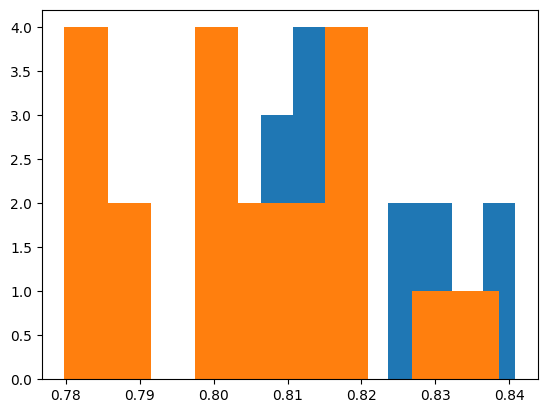

In [56]:
pylab.hist(accuracy_results_fe), pylab.hist(accuracy_results)

## Submission 

In [57]:
# Feature enginnering
test['Embarked_S'] = (test['Embarked'] == 'S').map(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabin_null'] = test['Cabin'].isnull().astype(int)

test['Miss'] = test['Name'].str.contains('Miss').astype(int)
test['Mrs'] = test['Name'].str.contains('Mrs').astype(int)

test['Master'] = test['Name'].str.contains('Master').astype(int)
test['Col'] = test['Name'].str.contains('Col').astype(int)
test['Major'] = test['Name'].str.contains('Major').astype(int)
test['Mr'] = test['Name'].str.contains('Mr').astype(int)

# Train model
model = LogisticRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(test[features].fillna(-1))

C:\Users\caioh\Documents\Projetos\kaggle\competitions\titanic-machine_learning_from_disaster\titanic_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
submission = pd.Series(predictions, index=test['PassengerId'], name='Survived')
submission.shape

(418,)

In [59]:
submission.to_csv('predictions.csv', header=True)